# Flocking Algorithms in $\mathbb{R}^2$

## Introduction

In this task, we investigate flocking algorithms in $\mathbb{R}^2$, comparing **Algorithm 1** and **Algorithm 2** as discussed in the work of Olfati-Saber on multi-agent systems. We focus on the equations governing these algorithms and how to construct collective potential functions that lead to coordinated flocking behavior.

### 1. Agents' Dynamics

Each agent $ i $ is characterized by its position $ q_i \in \mathbb{R}^2 $ and velocity $ p_i \in \mathbb{R}^2 $. The dynamics of each agent are governed by:

$$
\ddot{q}_i = u_i
$$

or equivalently,

$$
\dot{q}_i = p_i \\
\dot{p}_i = u_i
$$

where $ u_i $ is the control input (acceleration) applied to agent $ i $.

---

### 2. Control Law for Algorithm 1

In **Algorithm 1**, the control input $ u_i^\alpha $ consists of two main components:

- **Gradient-Based Control**: Encourages agents to maintain a desired distance from their neighbors.
- **Velocity Matching (Consensus)**: Ensures agents align their velocities with their neighbors.

The control law is:

$$
u_i^\alpha = \underbrace{\sum_{j \in \mathcal{N}_i} \phi_{\alpha}\left( \| q_j - q_i \|_\sigma \right) n_{ij}}_{\text{Gradient-Based Term}} + \underbrace{\sum_{j \in \mathcal{N}_i} a_{ij}(q)(p_j - p_i)}_{\text{Consensus Term}}
$$

Where:

- $ \mathcal{N}_i $ is the set of neighbors of agent $ i $,
- $ \phi_\alpha(z) $ is the **action function** governing the interaction forces,
- $ \| \cdot \|_\sigma $ is the **σ-norm** (smooth distance function),
- $ n_{ij} $ is the normalized direction vector between agents $ i $ and $ j $,
- $ a_{ij}(q) $ is the adjacency element defining interaction weights.

---

### 3. Control Law for Algorithm 2

In **Algorithm 2**, an additional **navigational feedback** term $ u_i^\gamma $ is included to represent a group objective, such as moving toward a target destination. The control law becomes:

$$
u_i = u_i^\alpha + u_i^\gamma
$$

Where:

$$
u_i^\gamma = -c_1 (q_i - q_r) - c_2 (p_i - p_r)
$$

- $ q_r $ and $ p_r $ are the reference position and velocity of the **γ-agent** (representing the group objective),
- $ c_1, c_2 > 0 $ are constants that determine the strength of the feedback.

---

### 4. Important Functions and Definitions

#### 4.1. σ-Norm $ \| z \|_\sigma $

The **σ-norm** is a smooth approximation of the Euclidean norm, ensuring differentiability at $ z = 0 $:

$$
\| z \|_\sigma = \frac{1}{\varepsilon} \left( \sqrt{1 + \varepsilon \| z \|^2} - 1 \right)
$$

- $ \varepsilon > 0 $ is a fixed parameter.
- This norm avoids non-differentiability, which is important for smooth control inputs.

#### 4.2. Normalized Direction Vector $ n_{ij} $

The normalized direction vector between agents $ i $ and $ j $ is:

$$
n_{ij} = \sigma_\varepsilon(q_j - q_i) = \frac{q_j - q_i}{\sqrt{1 + \varepsilon \| q_j - q_i \|^2}}
$$

- Ensures smoothness and avoids singularities in the control law.

#### 4.3. Bump Function $ \rho_h(z) $

The **bump function** $ \rho_h(z) $ ensures a smooth cutoff of interactions beyond a certain range:

$$
\rho_h(z) =
\begin{cases}
1, & 0 \leq z < h \\
\frac{1}{2} \left( 1 + \cos\left( \pi \frac{z - h}{1 - h} \right) \right), & h \leq z < 1 \\
0, & z \geq 1
\end{cases}
$$

- $ h \in (0, 1) $ determines where the function starts to decrease from 1 to 0.
- Ensures that agents only interact with nearby neighbors.

#### 4.4. Adjacency Element $ a_{ij}(q) $

The adjacency element defines the interaction weight between agents $ i $ and $ j $:

$$
a_{ij}(q) = \rho_h\left( \frac{\| q_j - q_i \|_\sigma}{r_\alpha} \right)
$$

- $ r_\alpha = \| r \|_\sigma $ is the smoothed interaction range.
- Determines if agent $ j $ is within the interaction range of agent $ i $.

#### 4.5. Action Function $ \phi_\alpha(z) $

The **action function** $ \phi_\alpha(z) $ defines the attractive or repulsive force between agents:

$$
\phi_\alpha(z) = \rho_h\left( \frac{z}{r_\alpha} \right) \phi(z - d_\alpha)
$$

- $ d_\alpha = \| d \|_\sigma $ is the smoothed desired inter-agent distance.
- $ \phi(z) $ is a sigmoidal function shaping the interaction.

#### 4.6. Sigmoidal Function $ \phi(z) $

The function $ \phi(z) $ shapes the attraction and repulsion:

$$
\phi(z) = \frac{1}{2} \left[ (a + b) \sigma_1(z + c) + (a - b) \right]
$$

- $ \sigma_1(z) = \frac{z}{\sqrt{1 + z^2}} $
- $ c = \frac{|a - b|}{2 \sqrt{a b}} $
- Parameters $ a, b > 0 $ with $ 0 < a \leq b $ control the shape.

#### 4.7. Pairwise Potential Function $ \psi_\alpha(z) $

The **pairwise potential function** is obtained by integrating the action function:

$$
\psi_\alpha(z) = \int_{d_\alpha}^z \phi_\alpha(s) \, ds
$$

- Measures the potential energy between pairs of agents.
- Helps in constructing the collective potential function.

---

### Constants and Parameters

- **$ \varepsilon > 0 $**: Parameter for the σ-norm, ensuring differentiability.
- **$ h \in (0, 1) $**: Determines the transition point in the bump function.
- **$ d > 0 $**: Desired inter-agent distance.
- **$ r > d $**: Maximum interaction range between agents.
- **$ d_\alpha = \| d \|_\sigma $**: Smoothed desired distance.
- **$ r_\alpha = \| r \|_\sigma $**: Smoothed interaction range.
- **$ a, b > 0 $**: Parameters for shaping $ \phi(z) $, with $ 0 < a \leq b $. Parameter `a` response for stronger attraction and `b` for repulsion
- **$ c = \frac{|a - b|}{2 \sqrt{a b}} $**: Ensures $ \phi(0) = 0 $.
- **$ c_1, c_2 > 0 $**: Gains for the navigational feedback in Algorithm 2.

---

### Summary of Algorithms

- **Algorithm 1** focuses on local interactions between agents to achieve flocking without a specific group objective.
- **Algorithm 2** extends Algorithm 1 by adding a navigational feedback term that allows the group to move toward a common goal or follow a desired trajectory.

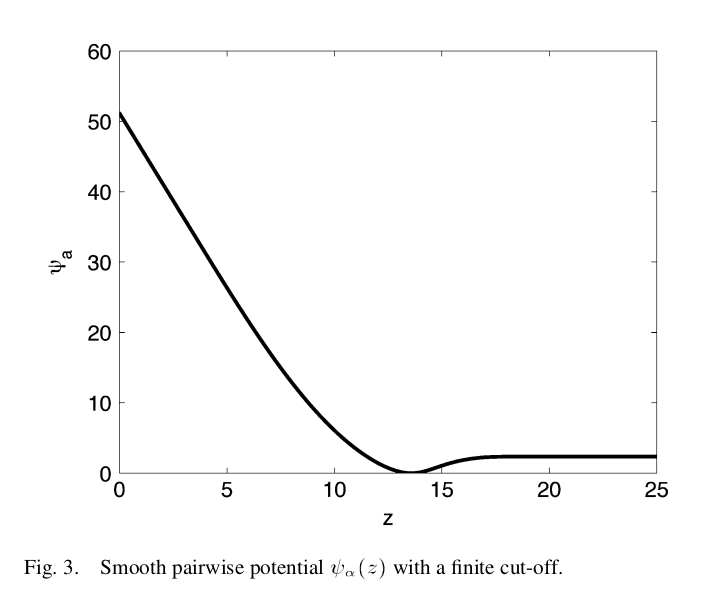

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from modules.animation import SimulationAnimation
from modules.Isystem import SystemInterface

In [9]:
import os
def get_next_filename(folder='',prefix='simulation', postfix='', ext='.gif'):
    num = len([file for file in os.listdir(folder) if file.lower().endswith(ext)])
    return os.path.join(folder,f'{prefix}{num}{postfix}{ext}')

In [85]:
import matplotlib.lines as mlines

class SimulationAnimation3(SimulationAnimation):
    def setup_plot(self):
        size = 100
        x = self.system.get_x()
        scat = self.ax.scatter(self.final_poses[:, 0], self.final_poses[:, 1], color='k', s=size / 4, alpha=0.5, zorder=1)
        traces = [self.ax.plot([], [], 'b-', lw=1, zorder=1, alpha=0.2)[0] for _ in range(self.N)]

        # Adding circles to represent the interaction radius
        self.circles = [plt.Circle(x[i], radius=self.system.interaction_radius, color='gray', fill=False, alpha=0.2, lw=1)
                        for i in range(self.N)]
        for circle in self.circles:
            self.ax.add_patch(circle)

        # Initialize the lines that will represent the connections between agents within the interaction radius
        self.connection_lines = [mlines.Line2D([], [], color='red', lw=1, alpha=0.6) for _ in range(self.N * (self.N - 1) // 2)]
        for line in self.connection_lines:
            self.ax.add_line(line)

        self.ax.set_title("Simulation Time: 0.00 seconds")
        self.ax.set_xlim(self.limits)
        self.ax.set_ylim(self.limits)
        if self.squareAxis:
            self.ax.set_aspect('equal', adjustable='box')
        self.fig.tight_layout()

        return scat, traces, np.zeros(len(self.final_poses[:, 0]))

    def update(self, frame):
        self.system.update(self.dt)
        x = self.system.get_x()
        self.scat.set_offsets(x)

        # Update the positions of the circles (interaction radii)
        for i in range(self.N):
            self.circles[i].center = x[i]

        # Update traces (path history)
        for i in range(self.N):
            self.trace_data[i] = np.vstack([self.trace_data[i], x[i]])
            self.traces[i].set_data(self.trace_data[i][:, 0], self.trace_data[i][:, 1])

        # Update connections between agents based on interaction radius
        line_idx = 0
        interaction_radius_squared = self.system.interaction_radius ** 2
        for i in range(self.N):
            for j in range(i + 1, self.N):
                distance_squared = np.sum((x[i] - x[j]) ** 2)
                if distance_squared <= interaction_radius_squared:
                    # Set the line between agents i and j if within the radius
                    self.connection_lines[line_idx].set_data([x[i, 0], x[j, 0]], [x[i, 1], x[j, 1]])
                    self.connection_lines[line_idx].set_visible(True)
                else:
                    # Hide the line if they are outside the interaction radius
                    self.connection_lines[line_idx].set_visible(False)
                line_idx += 1

        self.ax.set_title(f"Simulation Time: {frame * self.dt:.2f} seconds")
        return self.scat, *self.traces, *self.circles, *self.connection_lines


In [119]:
class FlockingSystemOne(SystemInterface):
    def __init__(self, num_agents, interaction_radius, desired_distance, epsilon=0.1, h=0.2, a=3.0, b=5.0):
        self.num_agents = num_agents
        self.epsilon = epsilon  # Small constant for the σ-norm
        self.h = h  # Parameter for the bump function
        self.desired_distance = desired_distance  # Desired inter-agent distance
        self.interaction_radius = interaction_radius # Interaction radius
        self.min_distance = 0.05 # for colide to prevent collisions

        # Parameters for the phi function
        self.a = a # attraction force
        self.b = b # repulsion force (b < a)
        self.c = abs(self.a - self.b) / (2 * np.sqrt(self.a * self.b))

        # Compute smoothed desired distance and interaction range (scalars)
        self.d_alpha = self.sigma_norm(self.desired_distance)
        self.r_alpha = self.sigma_norm(self.interaction_radius)

        # Initialize positions and velocities randomly
        self.positions = np.random.rand(num_agents, 2) * 13
        self.velocities = np.random.randn(num_agents, 2)

    def sigma_norm(self, input_value):
        """Compute the σ-norm"""
        d = input_value if np.isscalar(input_value) else np.linalg.norm(input_value, axis=-1)
        return (1 / self.epsilon) * (np.sqrt(1 + self.epsilon * d ** 2) - 1)

    def sigma_epsilon(self, z):
        """Compute σ_ε(z)."""
        return z / np.sqrt(1 + self.epsilon * np.linalg.norm(z, axis=-1, keepdims=True) ** 2)

    def phi(self, z):
        """Compute the φ(z) function."""
        sigma_1 = (z + self.c) / np.sqrt(1 + (z + self.c) ** 2)
        return 0.5 * ((self.a + self.b) * sigma_1 + (self.a - self.b))

    def rho_h(self, z):
        """Compute the bump function ρ_h(z)."""
        result = np.zeros_like(z)
        result[(z >= 0) & (z < self.h)] = 1     # For z in [0, h)
        idx = (z >= self.h) & (z < 1)           # For z in [h, 1]
        result[idx] = 0.5 * (1 + np.cos(np.pi * (z[idx] - self.h) / (1 - self.h)))
        return result

    def phi_alpha(self, z):
        """Compute the action function φ_α(z)."""
        rho = self.rho_h(z / self.r_alpha)
        phi = self.phi(z - self.d_alpha)
        return rho * phi

    def adjacency(self, z):
        """Compute the adjacency function a_ij(q)."""
        return self.rho_h(z / self.r_alpha)

    def u_alpha(self, index):
        N = self.num_agents
        u_alpha = np.zeros(2)
        delta_q = self.positions - self.positions[index]  # Shape: (N, 2)
        delta_p = self.velocities - self.velocities[index]  # Shape: (N, 2)

        # Exclude self-interaction
        mask = np.ones(N, dtype=bool)
        mask[index] = False
        delta_q = delta_q[mask]
        delta_p = delta_p[mask]

        # Compute adjacency values a_ij(q)
        z = self.sigma_norm(delta_q)  # σ-norm distances
        a_ij = self.adjacency(z)

        # Add hard collision avoidance: If agents are too close, apply strong repulsion
        too_close = np.linalg.norm(delta_q, axis=1) < self.min_distance
        if np.any(too_close):
            delta_q[too_close] *= 10  # Amplify repulsion for too-close agents

        # Only consider neighbors where a_ij > 0
        neighbor_mask = a_ij > 0
        if not np.any(neighbor_mask): 
            return 0  # No neighbors

        delta_q = delta_q[neighbor_mask]
        delta_p = delta_p[neighbor_mask]
        a_ij = a_ij[neighbor_mask]
        z = z[neighbor_mask]

        # Compute subfunctions
        n_ij = self.sigma_epsilon(delta_q)
        phi_alpha_z = self.phi_alpha(z)
        grad_term = np.sum(phi_alpha_z[:, np.newaxis] * n_ij, axis=0)
        consensus_term = np.sum(a_ij[:, np.newaxis] * delta_p, axis=0)
        
        u_alpha = grad_term + consensus_term
        return u_alpha
        
    def update(self, dt):
        """Update the positions and velocities of agents."""
        accelerations = np.zeros_like(self.positions)
        for i in range(self.num_agents):
            accelerations[i] = self.u_alpha(i)

        self.positions += self.velocities * dt + 0.5 * accelerations * dt ** 2
        self.velocities += accelerations * dt

    def get_x(self):
        """Return current positions for plotting."""
        return self.positions
    
    def get_final_poses(self):
        """Get the final poses for plotting."""
        return self.positions

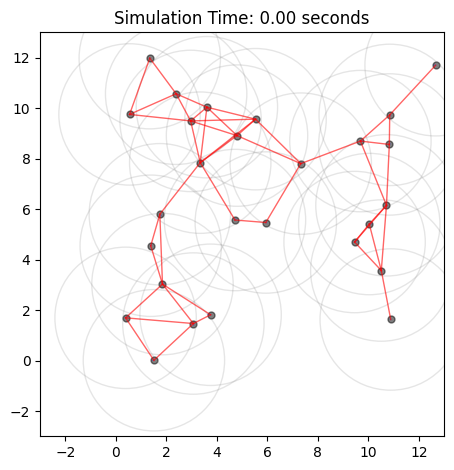

In [123]:
# Parameters
num_agents = 27
interaction_radius = 2.8
desired_distance = 1.9
h = 0.4
a = 7.0
b = 9.0
epsilon = 0.1
dt = 0.05  # Time step

# Create the flocking system
flocking_system = FlockingSystemOne(num_agents, interaction_radius, desired_distance, epsilon, h, a, b)
simulation = SimulationAnimation3(flocking_system, dt=dt, limits=(-3, 13), squareAxis=True)
ani = simulation.run_animation(frames=100, interval=100)
plt.show()
ani.save(get_next_filename(folder='./',prefix='algorithm1_', postfix=f"[ir={interaction_radius}, dd={desired_distance}, {h=}, {a=}, {b=}]"), writer='pillow', fps=10)

In [105]:
class FlockingSystemTwo(FlockingSystemOne):
    def __init__(self, num_agents, interaction_radius, desired_distance, epsilon=0.1, h=0.2, a=3.0, b=5.0, c1=1.0, c2=1.0):
        super().__init__(num_agents, interaction_radius, desired_distance, epsilon, h, a, b)
        # Gains for the navigational feedback term
        self.c1 = c1
        self.c2 = c2
        self.counter = 0
        
        # Reference position and velocity for the γ-agent (the target or group goal)
        self.q_r = np.array([5.0, 5.0])  # Example fixed target position
        self.p_r = np.array([0.0, 0.0])  # Example fixed target velocity
    
    def u_gamma(self, index):
        """Compute the navigational feedback term u_i^γ."""
        q_i = self.positions[index]
        p_i = self.velocities[index]
        u_gamma = -self.c1 * (q_i - self.q_r) - self.c2 * (p_i - self.p_r)
        return u_gamma
    
    def update(self, dt):
        """Update the positions and velocities of agents."""
        accelerations = np.zeros_like(self.positions)
        for i in range(self.num_agents):
            # Compute the total control input: u_alpha + u_gamma
            u_alpha = self.u_alpha(i)
            u_gamma = self.u_gamma(i)
            if (i == 5): 
                self.counter += 1
                if self.counter % 10 == 0:
                    print(f"{u_alpha=}, {u_gamma=}")
            accelerations[i] = u_alpha + u_gamma
            
        self.positions += self.velocities * dt + 0.5 * accelerations * dt ** 2
        self.velocities += accelerations * dt

    def set_target(self, target_position, target_velocity):
        """Set the reference target position and velocity for the γ-agent."""
        self.q_r = np.array(target_position)
        self.p_r = np.array(target_velocity)

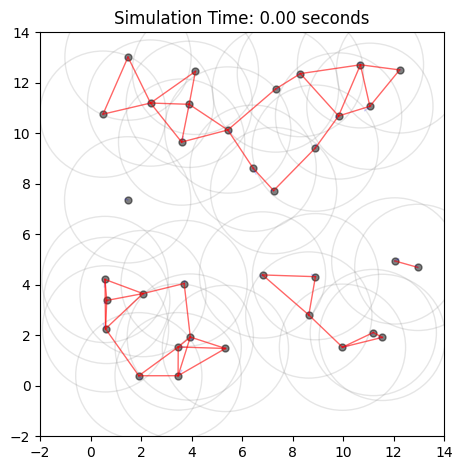

u_alpha=array([2.756538  , 4.10424586]), u_gamma=array([0.08785128, 0.1691632 ])
u_alpha=array([-0.16185772,  0.03484685]), u_gamma=array([ 0.32997904, -0.01257448])
u_alpha=array([-1.49219879, -0.4663429 ]), u_gamma=array([ 0.22885725, -0.02609873])
u_alpha=array([-2.07770813, -1.38595546]), u_gamma=array([ 0.11275877, -0.46365926])
u_alpha=array([-1.864369, -1.895051]), u_gamma=array([-0.00724294,  0.24725361])
u_alpha=array([-0.9092424, -0.1265468]), u_gamma=array([ 0.06876467, -0.01155227])
u_alpha=array([-0.40973594,  0.02959639]), u_gamma=array([0.01086119, 0.05158591])
u_alpha=array([0.04228757, 0.04818554]), u_gamma=array([0.02280467, 0.01758539])
u_alpha=array([0.0193333 , 0.10760227]), u_gamma=array([0.00788653, 0.01403915])
u_alpha=array([0.12479664, 0.13121598]), u_gamma=array([ 0.01140975, -0.00068717])
u_alpha=array([0.03831733, 0.01403457]), u_gamma=array([0.0036499 , 0.00720271])
u_alpha=array([0.07364328, 0.09976078]), u_gamma=array([ 0.00493338, -0.0051482 ])
u_alpha=

In [121]:
# Parameters
num_agents = 35
interaction_radius = 2.5
desired_distance = 1.7
epsilon = 0.01
h = 0.2
dt = 0.1  # Time step
a = 7.0
b = 15
c1 = 0.0 # target position force
c2 = 0.5 # target velocity force

# Create the flocking system for Algorithm 2
flocking_system = FlockingSystemTwo(num_agents, interaction_radius, desired_distance, epsilon, h, a, b, c1, c2)
flocking_system.set_target([5.0, 5.0], [0.7, 0.1])

simulation = SimulationAnimation3(flocking_system, dt=dt, limits=(-2, 14), squareAxis=True)
ani = simulation.run_animation(frames=150, interval=100)
plt.show()
ani.save(get_next_filename(folder='./',prefix='algorithm2_', postfix=f"[ir={interaction_radius}, dd={desired_distance}, {h=}, {a=}, {b=}, {c1=}, {c2=}]"), writer='pillow', fps=10)